# Chapter: Best Practices

# Topic:  Regularization to prevent overfitting

In [1]:
# read data
import numpy as np
data = np.loadtxt('quadratic_raw_data.csv', delimiter=',')
x = data[:,0,None]; y = data[:,1,None]

# separate training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [2]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                    Ordinary Least Squares Regression
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [3]:
# create pipeline for quadratic fit via OLS
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

pipe_OLS = Pipeline([('poly', PolynomialFeatures(degree=10, include_bias=False)),
                 ('scaler', StandardScaler()),
                 ('model', LinearRegression())])

In [4]:
# fit pipeline and predict
pipe_OLS.fit(x_train, y_train)
y_predicted_train_OLS = pipe_OLS.predict(x_train)
y_predicted_test_OLS = pipe_OLS.predict(x_test)

In [5]:
# performance metrics
from sklearn.metrics import mean_squared_error as mse

print('OLS Training metric (mse) = ', mse(y_train, y_predicted_train_OLS))
print('OLS Test metric (mse) = ', mse(y_test, y_predicted_test_OLS))

OLS Training metric (mse) =  0.313071428072055
OLS Test metric (mse) =  6.9508263488478885


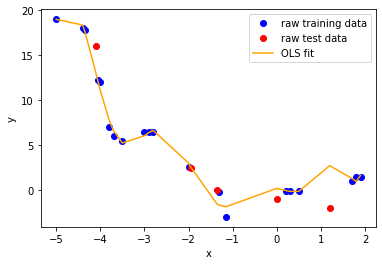

In [6]:
# plot predictions
y_predicted_OLS = pipe_OLS.predict(x)

from matplotlib import pyplot as plt
plt.figure()
plt.plot(x_train,y_train, 'bo', label='raw training data')
plt.plot(x_test,y_test, 'ro', label='raw test data')
plt.plot(x,y_predicted_OLS, color='orange', label='OLS fit')
plt.legend()
plt.xlabel('x'), plt.ylabel('y')
plt.show()

In [8]:
# print coefficients
print(pipe_OLS['model'].coef_)

[[-1.96123403e+00 -1.70142862e+01  1.61112987e+02  5.53503743e+02
  -1.47185815e+03 -5.24500174e+03  9.88824037e+02  1.58830783e+04
   1.72273909e+04  5.73349950e+03]]


In [9]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                    Ridge Regression
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [10]:
# create pipeline for quadratic fit via ridge model 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

pipe_L2 = Pipeline([('poly', PolynomialFeatures(degree=10,include_bias=False)),
                    ('scaler', StandardScaler()),
                    ('model', Ridge(alpha=0.1))])


In [11]:
# fit pipeline and predict
pipe_L2.fit(x_train, y_train)
y_predicted_train_L2 = pipe_L2.predict(x_train)
y_predicted_test_L2 = pipe_L2.predict(x_test)

In [12]:
# performance metrics
from sklearn.metrics import mean_squared_error as mse

print('L2 Training metric (mse) = ', mse(y_train, y_predicted_train_L2))
print('L2 Test metric (mse) = ', mse(y_test, y_predicted_test_L2))

L2 Training metric (mse) =  3.197250376366909
L2 Test metric (mse) =  3.4474715991628373


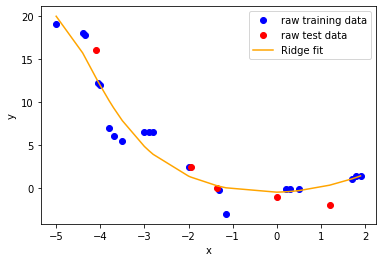

In [13]:
# plot predictions
y_predicted_L2 = pipe_L2.predict(x)

plt.figure()
plt.plot(x_train,y_train, 'bo', label='raw training data')
plt.plot(x_test,y_test, 'ro', label='raw test data')
plt.plot(x,y_predicted_L2, color='orange', label='Ridge fit')
plt.legend()
plt.xlabel('x'), plt.ylabel('y')
plt.show()

In [14]:
# print coefficients
print(pipe_L2['model'].coef_)

[[ 0.27326159  3.49270237 -0.35861471  0.59074719 -1.20522322  1.9065296
  -1.80640701  0.86690221  0.87244476 -3.20685088]]


In [15]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                    Lasso Regression
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [16]:
# create pipeline for quadratic fit via ridge model 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

pipe_L1 = Pipeline([('poly', PolynomialFeatures(degree=10,include_bias=False)),
                    ('scaler', StandardScaler()),
                    ('model', Lasso(alpha=0.1))])

In [17]:
# fit pipeline and predict
pipe_L1.fit(x_train, y_train)
y_predicted_train_L1 = pipe_L1.predict(x_train)
y_predicted_test_L1 = pipe_L1.predict(x_test)

In [18]:
# performance metrics
from sklearn.metrics import mean_squared_error as mse

print('L1 Training metric (mse) = ', mse(y_train, y_predicted_train_L1))
print('L1 Test metric (mse) = ', mse(y_test, y_predicted_test_L1))

L1 Training metric (mse) =  3.5966292903741497
L1 Test metric (mse) =  3.9280112362976154


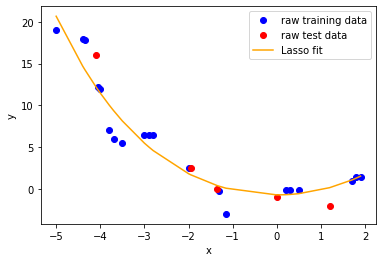

In [19]:
# plot predictions
y_predicted_L1 = pipe_L1.predict(x)

plt.figure()
plt.plot(x_train,y_train, 'bo', label='raw training data')
plt.plot(x_test,y_test, 'ro', label='raw test data')
plt.plot(x,y_predicted_L1, color='orange', label='Lasso fit')
plt.legend()
plt.xlabel('x'), plt.ylabel('y')
plt.show()

In [20]:
# print coefficients
print(pipe_L1['model'].coef_)

[-0.          4.38109181 -0.09273215  1.679048   -0.          0.
 -0.          0.          0.         -0.        ]
